In [1]:
import obspy
import numpy as np
import matplotlib.pyplot as plt
import h5py
import numpy as np
import warnings
import matplotlib.pyplot as plt
from obspy import read

warnings.filterwarnings('ignore')
FF = r'Data_Seismic/DataCollected'
fall = h5py.File(FF, 'w')

# STEAD DataSet

In [2]:

# Loading IDs
t1 = np.load('train_EQ.npy')
t2 = np.load('valid_EQ.npy')
t3 = np.load('test_EQ.npy')
t = np.concatenate([t1,t2,t3])

# Loading the file and data.
file_name = r'Data_Seismic/STEAD/mergedata/merged.hdf5'
fl = h5py.File(file_name, 'r')
idall = []

for k in range(0,len(t)):
    
    ID = t[k]
    dataset = fl.get('data/'+str(ID))

    if ID.split('_')[-1] == 'EV':
        data = np.array(dataset)                    
        spt = int(dataset.attrs['p_arrival_sample']);
        sst = int(dataset.attrs['s_arrival_sample']);
        coda_end = int(dataset.attrs['coda_end_sample']);
        snr = dataset.attrs['snr_db'];
        dep = dataset.attrs['source_depth_km']

        mag    =   dataset.attrs['source_magnitude']
        magtyp =   dataset.attrs['source_magnitude_type']
        evlat  =   dataset.attrs['source_latitude']
        evlon  =   dataset.attrs['source_longitude']
        stlat  =   dataset.attrs['receiver_latitude']
        stlon  =   dataset.attrs['receiver_longitude']
        datatyp = 'earthquake'
        datalabel = 1
        
        

        
    elif ID.split('_')[-1] == 'NO':
        data = np.array(dataset)
        spt = 'None'
        sst = 'None'
        coda_end = 'None'
        snr = 'None'
        dep = 'None'
        mag    =   'None'
        magtyp =   'None'
        evlat  =   'None'
        evlon  =   'None'
        stlat  =   dataset.attrs['receiver_latitude']
        stlon  =   dataset.attrs['receiver_longitude']
        datatyp = 'noise'
        datalabel = 0

    polar = 'None'
    st = read()
    st[0].data = data[:,0]
    st[1].data = data[:,1]
    st[2].data = data[:,2]
    st = st.filter(type='bandpass', freqmin = 1.0, freqmax = 45, corners=2, zerophase=True)
    st = st.taper(max_percentage=0.01, type='cosine', max_length=2) 
    data[:,0] = st[0].data
    data[:,1] = st[1].data
    data[:,2] = st[2].data

    g = fall.create_group(ID)
    d = g.create_dataset('data',data=data)
    g.attrs['p_arrival_sample'] = spt
    g.attrs['s_arrival_sample'] = sst
    g.attrs['coda_end_sample'] = coda_end
    g.attrs['snr_db'] = snr
    g.attrs['depth'] = dep
    g.attrs['magnitude'] = mag
    g.attrs['magnitude_type'] = magtyp
    g.attrs['event_lat'] = evlat
    g.attrs['event_long'] = evlon
    g.attrs['station_lat'] = stlat
    g.attrs['station_long'] = stlon  
    g.attrs['data_category'] = datatyp
    g.attrs['P_polarity'] = polar
    g.attrs['event_label'] = datalabel
    g.attrs['AI_Set'] = 'STEAD'
    
    idall.append(ID)
                    
    
fl.close()


# Texas DataSet

In [4]:
import h5py
import numpy as np
f = h5py.File(r'Data_Seismic/TEXD/TXED_20231111-001.h5', 'r')
eventid=np.load(r'Data_Seismic/TEXD/ID_20231111.npy')


for k in range(0,len(eventid)):
    
    ID = eventid[k]
    dataset = f.get(ID)
    data = np.array(dataset['data'])

    if dataset.attrs['trace_category'] =='earthquake_local':
        
        spt = int(dataset.attrs['p_arrival_sample']);
        sst = int(dataset.attrs['s_arrival_sample']);
        coda_end = int(dataset.attrs['coda_end_sample']);
        snr = dataset.attrs['snr_db'];
        dep = dataset.attrs['ev_depth']

        mag    =   dataset.attrs['magnitude']
        magtyp =   'None'
        evlat  =   dataset.attrs['ev_latitude']
        evlon  =   dataset.attrs['ev_longitude']
        stlat  =   dataset.attrs['sta_latitude']
        stlon  =   dataset.attrs['sta_longitude']
        datatyp = 'earthquake'
        polar = dataset.attrs['polarity']
        datalabel = 1

        
    else:
        spt = 'None'
        sst = 'None'
        coda_end = 'None'
        snr = 'None'
        dep = 'None'
        mag    =   'None'
        magtyp =   'None'
        evlat  =   'None'
        evlon  =   'None'
        stlat  =   dataset.attrs['sta_latitude']
        stlon  =   dataset.attrs['sta_longitude']
        datatyp = 'noise'
        polar = 'None'
        datalabel = 0
    
    g = fall.create_group(ID)
    d = g.create_dataset('data',data=data)
    g.attrs['p_arrival_sample'] = spt
    g.attrs['s_arrival_sample'] = sst
    g.attrs['coda_end_sample'] = coda_end
    g.attrs['snr_db'] = snr
    g.attrs['depth'] = dep
    g.attrs['magnitude'] = mag
    g.attrs['magnitude_type'] = magtyp
    g.attrs['event_lat'] = evlat
    g.attrs['event_long'] = evlon
    g.attrs['station_lat'] = stlat
    g.attrs['station_long'] = stlon  
    g.attrs['data_category'] = datatyp
    g.attrs['P_polarity'] = polar
    g.attrs['event_label'] = datalabel
    g.attrs['AI_Set'] = 'Texas'
    idall.append(ID)
                    
    
f.close()


# Instance Events

In [6]:
import pandas as pd
# file NAMES
# MetaData
events_metaname_bz2=r'Data_Seismic/Instance/metadata_Instance_events_v2.csv.bz2' # Either Counts and GroundMotion
#noise_metaname=os.path.join(METADIR,'metadata_Instance_noise.csv')
# HDF5
events_hdfname=r'Data_Seismic/Instance/Instance_events_counts.hdf5'

events_metaData = pd.read_csv(events_metaname_bz2, keep_default_na=False, dtype={'station_location_code': object, 
            'source_mt_eval_mode':object,'source_mt_status': object,'source_mechanism_strike_dip_rake': object, 
            'source_mechanism_moment_tensor': object, 'trace_p_arrival_time': object, 'trace_s_arrival_time': object})
list_eve=['trace_E_min_counts','trace_N_min_counts','trace_Z_min_counts',
         'trace_E_max_counts','trace_N_max_counts','trace_Z_max_counts',
         'trace_E_median_counts','trace_N_median_counts','trace_Z_median_counts',
         'trace_E_mean_counts','trace_N_mean_counts','trace_Z_mean_counts',
         'trace_E_pga_perc','trace_N_pga_perc','trace_Z_pga_perc',
         'trace_E_pga_cmps2','trace_N_pga_cmps2','trace_Z_pga_cmps2',
         'trace_E_pgv_cmps','trace_N_pgv_cmps','trace_Z_pgv_cmps',
         'trace_E_snr_db','trace_N_snr_db','trace_Z_snr_db',
         'trace_E_sa03_cmps2','trace_N_sa03_cmps2','trace_Z_sa03_cmps2',
         'trace_pgv_cmps', 'trace_pga_perc','trace_P_arrival_sample','trace_S_arrival_sample',
         'trace_EQT_number_detections','trace_EQT_P_number','trace_EQT_S_number','trace_GPD_P_number','trace_GPD_S_number']


for ele in list_eve:
    events_metaData[ele] =  pd.to_numeric(events_metaData[ele], errors='coerce')
    

chosen_lines = []
plots_line = 3

df_tmp = events_metaData.loc[(events_metaData.trace_P_arrival_sample > 0) & (events_metaData.trace_S_arrival_sample > 0) ]

#df_tmp = events_metaData.loc[(events_metaData.trace_P_arrival_sample > 0)]
#
ntot = df_tmp.shape[0]
#print ("N records: ", ntot, "% total: ", float(ntot/TOTAL * 100.))
#
if ntot > 0:
    lista = list(df_tmp.sample(n=plots_line, random_state=1).index)
    chosen_lines = chosen_lines + lista
    chosen_lines
else:
    print('no waveform found')

In [7]:
from Def_plot_waveform import split, build_stream, multiple_streams

events_h5File = h5py.File(events_hdfname, 'r') # Events in counts
filt = False
#filt = True
freq_min=1
freq_max=45
h5 = events_h5File
wftype='ev_c'

for line in range(0,len(df_tmp)):
#for line in range(0,10):
    
    
    st, row = build_stream(df_tmp,h5,line,wftype,filt,freq_min,freq_max)
    st = st.filter(type='bandpass', freqmin = 1.0, freqmax = 45, corners=2, zerophase=True)
    st = st.taper(max_percentage=0.01, type='cosine', max_length=2) 

    ID = row.trace_name
    evlat = row.source_latitude_deg
    evlon = row.source_longitude_deg
    dep = row.source_depth_km

    mag = row.source_magnitude
    magtyp = row.source_magnitude_type

    stlat = row.station_latitude_deg
    stlon = row.station_longitude_deg

    datatyp = row.source_type
    
    spt = row.trace_P_arrival_sample
    sst = row.trace_S_arrival_sample

    polar = row.trace_polarity
    
    snr = [row.trace_E_snr_db,row.trace_N_snr_db,row.trace_Z_snr_db]
    
    coda_end = spt+2*(sst-spt)
    if coda_end>6000:
        coda_end = 6000
    
    datalabel = 1
    
    data = np.zeros((6000,3))
    data[:,0] = st[0].data[0:6000]
    data[:,1] = st[1].data[0:6000]
    data[:,2] = st[2].data[0:6000]
    
    if (spt<6000) and (sst<6000):
        g = fall.create_group(ID)
        d = g.create_dataset('data',data=data)
        g.attrs['p_arrival_sample'] = spt
        g.attrs['s_arrival_sample'] = sst
        g.attrs['coda_end_sample'] = coda_end
        g.attrs['snr_db'] = snr
        g.attrs['depth'] = dep
        g.attrs['magnitude'] = mag
        g.attrs['magnitude_type'] = magtyp
        g.attrs['event_lat'] = evlat
        g.attrs['event_long'] = evlon
        g.attrs['station_lat'] = stlat
        g.attrs['station_long'] = stlon  
        g.attrs['data_category'] = datatyp
        g.attrs['P_polarity'] = polar
        g.attrs['event_label'] = datalabel
        g.attrs['AI_Set'] = 'Instance'
        idall.append(ID)
    


# Instance Noise

In [8]:
import pandas as pd
import numpy as np
noise_metaname = r'Data_Seismic/Instance/metadata_Instance_noise.csv.bz2'
noise_hdfname =  r'Data_Seismic/Instance/Instance_noise.hdf5'
noise_metaData = pd.read_csv(noise_metaname,dtype={'station_location_code': object}, low_memory=False)
noise_h5File = h5py.File(noise_hdfname, 'r')   # Noise in counts


In [9]:
from Def_plot_waveform import split, build_stream, multiple_streams
filt = False
#filt = True
freq_min=1
freq_max=45
wftype='noise'
#for line in range(0,len(df_tmp)):
for line in range(0,len(noise_metaData)):
    
    
    st, row = build_stream(noise_metaData,noise_h5File,line,wftype,filt,freq_min,freq_max)
    st = st.filter(type='bandpass', freqmin = 1.0, freqmax = 45, corners=2, zerophase=True)
    st = st.taper(max_percentage=0.01, type='cosine', max_length=2) 

    ID = row.trace_name

    stlat = row.station_latitude_deg
    stlon = row.station_longitude_deg

    datatyp = 'noise'
    
    spt = 'None'
    sst = 'None'
    coda_end = 'None'
    snr = 'None'
    dep = 'None'
    mag    =   'None'
    magtyp =   'None'
    evlat  =   'None'
    evlon  =   'None'
    datatyp = 'noise'
    polar = 'None'
    datalabel = 0
    
    data = np.zeros((6000,3))
    data[:,0] = st[0].data[0:6000]
    data[:,1] = st[1].data[0:6000]
    data[:,2] = st[2].data[0:6000]
    
    g = fall.create_group(ID)
    d = g.create_dataset('data',data=data)
    g.attrs['p_arrival_sample'] = spt
    g.attrs['s_arrival_sample'] = sst
    g.attrs['coda_end_sample'] = coda_end
    g.attrs['snr_db'] = snr
    g.attrs['depth'] = dep
    g.attrs['magnitude'] = mag
    g.attrs['magnitude_type'] = magtyp
    g.attrs['event_lat'] = evlat
    g.attrs['event_long'] = evlon
    g.attrs['station_lat'] = stlat
    g.attrs['station_long'] = stlon  
    g.attrs['data_category'] = datatyp
    g.attrs['P_polarity'] = polar
    g.attrs['event_label'] = datalabel
    g.attrs['AI_Set'] = 'Instance'
    
    idall.append(ID)

In [10]:
fall.close()

In [1]:
## Save IDs
np.save('IDS_Collected_Data',idall)
len(idall)

NameError: name 'np' is not defined

# Read Collected File

In [13]:
# Loading the file and data.
file_name = r'Data_Seismic/STEAD/mergedata/merged.hdf5'
FF = r'Data_Seismic/DataCollected'

import h5py
import numpy as np
eventid = np.load('IDS_Collected_Data.npy')

kl = 5
idx = eventid[kl]
f = h5py.File(FF, 'r')
dataset = f.get(idx)
dat = np.array(dataset['data'])
if dataset.attrs['data_category']!='noise':
    spt = int(dataset.attrs['p_arrival_sample']);
    sst = int(dataset.attrs['s_arrival_sample']);
    coda_end = int(dataset.attrs['coda_end_sample']);
    snr = dataset.attrs['snr_db'];
    evlab = dataset.attrs['event_label']
    trace_category = dataset.attrs['data_category'];
    dic = {"P_arrival_Sample":spt,
          "S_arrival_Sample":sst,
          "Coda_end_sample":coda_end,
          "SNR(dB)":snr,
          "Trace Category":trace_category}        
    print(dic)
else:
    print('Noise')

dataset.attrs['AI_Set']

Noise


'STEAD'

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'bold' not found.
findfont: Font family 'bold' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not fou

('None', 'None', 'None', 'None')

findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'bold' not found.
findfont: Font family 'bold' not found.
findfont: Font family 'bold' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found

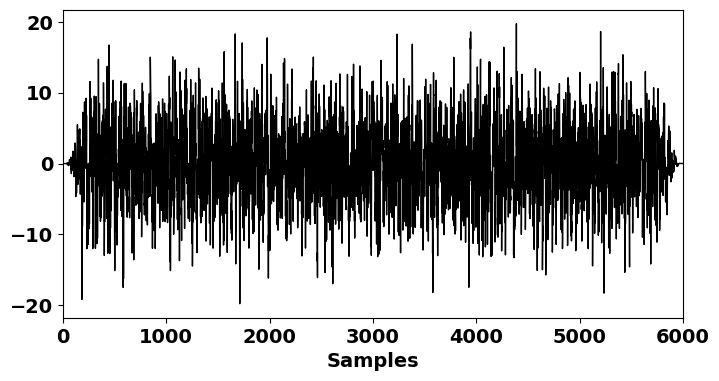

In [14]:
import matplotlib.pyplot as plt

font = {
        'weight' : 'bold',
        'size'   : 14}
plt.rc('font', **font)

fig = plt.figure(figsize=(8,4))
plt.rc('font', **font)
ax1 = plt.subplot(111)
plt.plot(dat[:,2],'k', label = 'Z' , linewidth = 1, markersize=1)
ymin,yma = ax1.get_ylim()
if dataset.attrs['data_category']!='noise':
    plt.vlines(spt,ymin,yma,color='r',linewidth=2, label='P-Sample')
    plt.vlines(sst,ymin,yma,color='b',linewidth=2, label='S-Sample')
    plt.legend(loc='lower right', fontsize = 14)
plt.xlim([0,6000])
plt.xlabel('Samples',font='bold')
fig.savefig('Example_Data2.png', bbox_inches='tight',transparent=True, dpi =100)
    
f.close()

spt,sst,coda_end,snr